In [53]:
!pip install tensorflow
!pip install keras
!pip install matplotlib


In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [55]:
import tensorflow as tf

# Check for GPU availability and configure memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is available and configured for memory growth")
    except RuntimeError as e:
        print(f"Error configuring GPU: {e}")
else:
    print("No GPU available, using CPU")

No GPU available, using CPU


Load Data


In [56]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [58]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


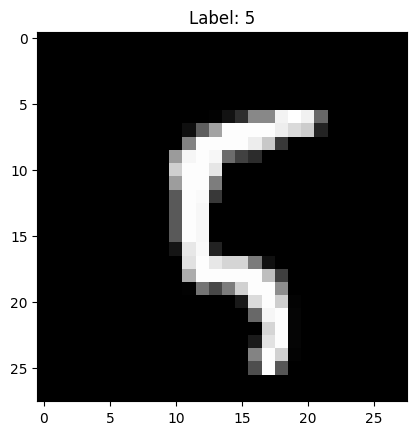

In [59]:
plt.imshow(x_train[100], cmap='gray')
plt.title(f'Label: {y_train[100]}')
plt.show()

In [60]:
#normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [61]:
#to categorical
print("before : label of image is ", y_train[10])
y_train = to_categorical(y_train)
print("after : label of image is ", y_train[10])
y_test = to_categorical(y_test)

before : label of image is  3
after : label of image is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [62]:
#architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [63]:
#compile 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
#training
result = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9072 - loss: 0.3325 - val_accuracy: 0.9461 - val_loss: 0.1882
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9553 - loss: 0.1554 - val_accuracy: 0.9623 - val_loss: 0.1303
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9681 - loss: 0.1100 - val_accuracy: 0.9656 - val_loss: 0.1145
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9749 - loss: 0.0845 - val_accuracy: 0.9706 - val_loss: 0.0976
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9798 - loss: 0.0670 - val_accuracy: 0.9705 - val_loss: 0.0994
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0533 - val_accuracy: 0.9736 - val_loss: 0.0889
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 0.9723 - val_loss: 0.0896
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.

In [65]:
# convert test labels to one-hot to match model's categorical output
loss,accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0823


In [66]:
print(result.history)

{'accuracy': [0.9072291851043701, 0.9552708268165588, 0.9681458473205566, 0.9749166369438171, 0.979770839214325, 0.9848333597183228, 0.987333357334137, 0.9899166822433472, 0.9920416474342346, 0.9928749799728394], 'loss': [0.33249861001968384, 0.1553567349910736, 0.10995617508888245, 0.08446449786424637, 0.06702930480241776, 0.053345780819654465, 0.04450056329369545, 0.03560837358236313, 0.029368406161665916, 0.024744000285863876], 'val_accuracy': [0.9460833072662354, 0.9623333215713501, 0.965583324432373, 0.9705833196640015, 0.9704999923706055, 0.9735833406448364, 0.9723333120346069, 0.9749166369438171, 0.9747499823570251, 0.9760000109672546], 'val_loss': [0.1881622076034546, 0.1302555501461029, 0.11451409012079239, 0.09763430804014206, 0.09941671043634415, 0.08894841372966766, 0.08956647664308548, 0.08662717044353485, 0.08300624787807465, 0.08725649118423462]}


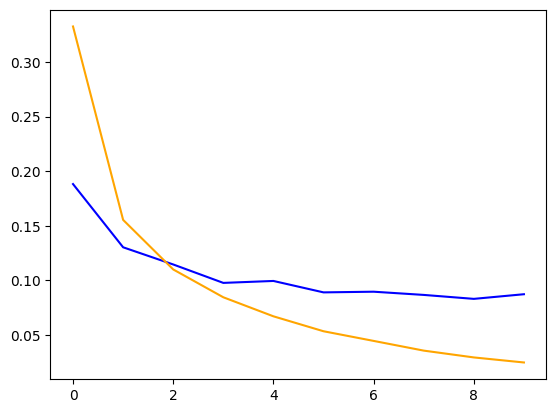

In [68]:
#visulization 
plt.plot(result.history['val_loss'], label='Validation Accuracy',color='blue')
plt.plot(result.history['loss'], label='Validation Loss',color='orange')
plt.show()